In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt, style
import seaborn as sns
style.use('ggplot')

spend = pd.read_excel("Credit Banking.xlsx",sheet_name="Spend")

spend['Date']=pd.to_datetime(spend['Date'],format="%Y-%m-%d")

spend['Month']=spend['Date'].dt.month_name()
spend['Year']=spend['Date'].dt.year

spend.columns=['Sl No:', 'Customer', 'Date', 'Type', 'Amount', 'Month', 'Year']


spend_summary=spend.groupby(['Customer','Year','Month'])['Amount'].sum().reset_index()

spend_summary['Amount'].fillna(0,inplace=True)

repay = pd.read_excel("Credit Banking.xlsx",sheet_name="Repayment")
repay['Date']=pd.to_datetime(repay['Date'],format="%Y-%m-%d")

repay['Month']=repay['Date'].dt.month_name()
repay['Year']=repay['Date'].dt.year

repay_summary=repay.groupby(['Customer','Year','Month'])['Amount'].sum().reset_index()


df=pd.merge(spend_summary,repay_summary,on=['Customer','Year','Month'],how="outer")

df.columns=['Customer', 'Year', 'Month', 'Amount_spend', 'Amount_repay']

df['Amount_repay'].fillna(0,inplace=True)
df['Amount_spend'].fillna(0,inplace=True)
df

customer = pd.read_excel("Credit Banking.xlsx",sheet_name="Customer")
df_final = pd.merge(df,customer,on="Customer",how="left")

df_final

# a.	Where ever the age value is less than 18, make it mean of age values
df_final[df_final['Age']<18]

meanAge = df_final['Age'].mean()

df_final['Age']=np.where(df_final['Age']<18,meanAge,df_final['Age'])

df_final.iloc[49:53,0:]

df_final['OutstandingAmt']=df_final['Amount_spend']-df_final['Amount_repay']

df_final['Interest']= np.where(df_final['OutstandingAmt']<0,0,
                               df_final['OutstandingAmt']*2.9/100)

pd.pivot_table(data=df_final,index=['Year','Month'],
              values=['Interest'],aggfunc='sum')

df_final.columns

spend.groupby('Type')['Amount'].sum().idxmax()

df_final[df_final['Amount_spend']>df_final['Limit']]["Customer"].unique()

df_final[df_final['Amount_spend']>
         df_final['Limit']][["Id","Customer"]].drop_duplicates()

bins = [0, 18, 35, 50, 65, 100]  # Age ranges
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']  # Corresponding labels

# Create the Age-Group column
df_final['Age-Group'] = pd.cut(df_final['Age'], bins=bins, labels=labels, right=False)

In [28]:
df2006 = df_final[df_final['Year']==2006]

In [34]:
custSpend = pd.pivot_table(data=df2006,index="Customer",values='Amount_spend',
                          aggfunc='sum').reset_index()

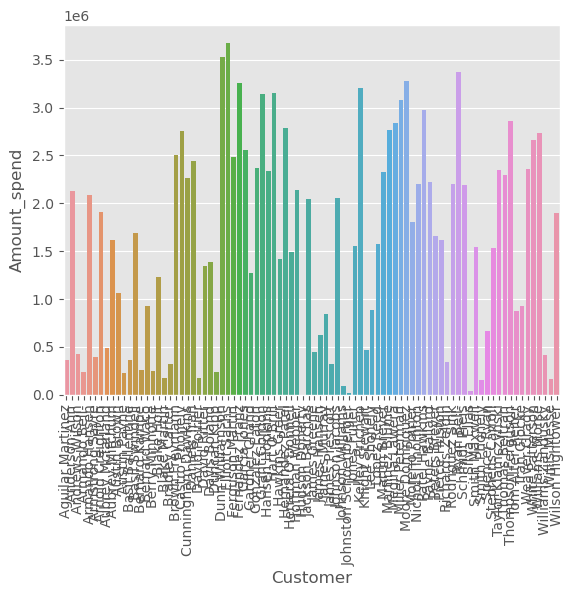

In [38]:
sns.barplot(data=custSpend,x="Customer",y="Amount_spend",estimator='sum')
plt.xticks(rotation=90)
plt.show()

In [40]:
res=pd.pivot_table(data=df2006,index='Month',
              values=['Amount_spend','Amount_repay','Interest'],
              aggfunc='sum')

<Axes: xlabel='Month'>

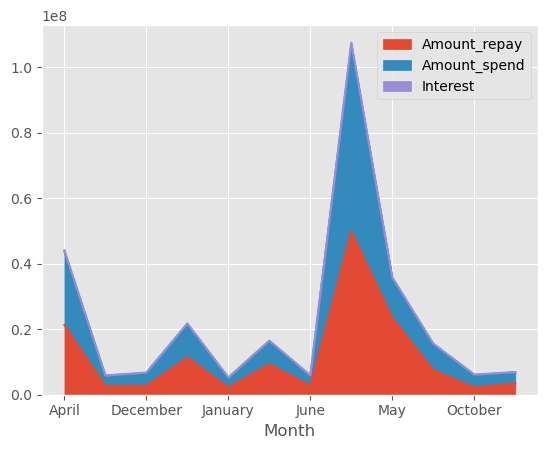

In [41]:
res.plot(kind='area',stacked=True)